In [1]:
"""
1. What is the key idea behind support vector machines?
    In comparison to "regular" model fitting the SVC's try to create the biggest possible area that
    separates the classes from each other, instead of taking all datapoints into consideration.
    SVR's in contrast follow the same idea but reversed in execution, such that they search for the area
    where most datapoints lay within.
2. What is a support vector?
    The support vectors are the datapoints that build the "outline" for creating the mentioned area. 
    The model adaption is exclusively based on them. 
3. Why is scaling imported data important.
    Even though outliers will not influence the model, a scaled distribution of the input data is necessary
    to guarantee even distances between the support vectors since they will have a major impact on the model's
    performance
4. Can SVC's return a confidence value for a datapoint? What about probabilities?
    I tend to say no for both instances since the SVC work deterministic. Once the "border" between
    the catagories/classes is established, every datapoint belongs to either one or the other.
5. Should one use a primal or dual SVM for a set with millions of m and hundred of n?

6. A SVC with RBF kernel is underfitting our test data. How can we adjust alpha and C to tackle that problem?
    If RBF kernels are underfitting we should increase our alpha to "harden" the resulting bellcurves and have
    a more specified model.

7. Suppose we have a linear SVC problem that we want to solve via a QP-Solver. What are suitable values for
our parameters H,f,A,b? (Quadratic problems)


"""

'\n1. What is the key idea behind support vector machines?\n    In comparison to "regular" model fitting the SVC\'s try to create the biggest possible area that\n    separates the classes from each other, instead of taking all datapoints into consideration.\n    SVR\'s in contrast follow the same idea but reversed in execution, such that they search for the area\n    where most datapoints lay within.\n2. What is a support vector?\n    The support vectors are the datapoints that build the "outline" for creating the mentioned area. \n    The model adaption is exclusively based on them. \n3. Why is scaling imported data important.\n    Even though outliers will not influence the model, a scaled distribution of the input data is necessary\n    to guarantee even distances between the support vectors since they will have a major impact on the model\'s\n    performance\n4. Can SVC\'s return a confidence value for a datapoint? What about probabilities?\n    I tend to say no for both instances 

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

iris_data = datasets.load_iris()

X = iris_data["data"][:,(2,3)] # Height and width of the leaves
y = (iris_data["target"] == 2).astype(np.float64) # iris virginica

svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1,loss="hinge"))
])

svm_clf.fit(X,y)


svc_linear_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",SVC(C=1,kernel="linear"))
])
svc_linear_clf.fit(X,y)

scores_svc_linear = cross_val_score(svc_linear_clf,X,y,cv=3,scoring="accuracy")
print("SVC: ",scores_svc_linear)
scores_svm = cross_val_score(svm_clf,X,y,cv=3,scoring="accuracy")
print("SVM: ",scores_svm)

SVC:  [0.98 0.98 0.9 ]
SVM:  [0.98 0.98 0.9 ]


'\nXt0 = []\nXt1 = []\nXt = []\nyt = []\n\nfor value in range(n):\n    x0val = rd.uniform(Xm[:,0].min(), Xm[:,0].max())\n    x1val = rd.uniform(Xm[:,1].min(), Xm[:,1].max())\n    Xt.append([x0val,x1val])\n    Xt0.append(x0val)\n    Xt1.append(x1val)\n    yt.append(svm_clf.predict(Xt))\n\n# plt.scatter(Xt0,Xt1,c=colors)\n'

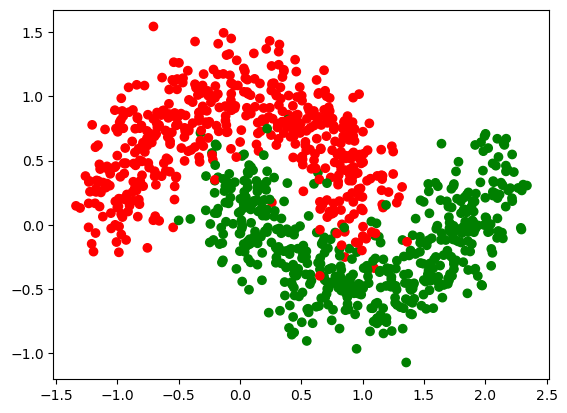

In [32]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import random as rd

n = 1000

Xm,ym = make_moons(n_samples=n, noise=0.2)

pn_svm_clf = Pipeline([
    ("polyfeatures",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(max_iter= 100000,C=10,loss="hinge"))
])

pn_svm_clf.fit(Xm,ym)
colors = ['red' if value == 0 else 'green' for value in ym]
plt.scatter(Xm[:,0],Xm[:,1],c=colors)
"""
Xt0 = []
Xt1 = []
Xt = []
yt = []

for value in range(n):
    x0val = rd.uniform(Xm[:,0].min(), Xm[:,0].max())
    x1val = rd.uniform(Xm[:,1].min(), Xm[:,1].max())
    Xt.append([x0val,x1val])
    Xt0.append(x0val)
    Xt1.append(x1val)
    yt.append(svm_clf.predict(Xt))

# plt.scatter(Xt0,Xt1,c=colors)
"""

In [30]:
svc_poly = Pipeline([
    ("scaler",StandardScaler()),
    ("poly_svm",SVC(kernel="poly",degree=3,coef0=1,C=0.001))
])

svc_poly.fit(Xm,ym)
scores_svc_poly = cross_val_score(svc_poly,Xm,ym,cv=4,scoring="accuracy")
print("Before: ", scores_svc_poly)

from sklearn.model_selection import GridSearchCV as GS
param_grid = [
    {"poly_svm__kernel":["poly"],
     "poly_svm__degree":[3,4,5],
     "poly_svm__coef0":[0.01,1,100],
     "poly_svm__C":[0.01,1,100]},
]
grid_search = GS(svc_poly,
                 param_grid,
                 cv=4,
                 scoring="accuracy",
                 return_train_score=True
)

grid_search.fit(Xm,ym) # Takes a while
best_parameters = grid_search.best_params_
print("Best Paramaters: ", best_parameters)
# 
best_estimator = grid_search.best_estimator_
print("Best Estimators: ",best_estimator)
new_scores_svc_poly = cross_val_score(best_estimator,Xm,ym,cv=4,scoring="accuracy")
print("After: ",new_scores_svc_poly)

Before:  [0.836 0.856 0.868 0.868]
Best Paramaters:  {'poly_svm__C': 1, 'poly_svm__coef0': 1, 'poly_svm__degree': 3, 'poly_svm__kernel': 'poly'}
Best Estimators:  Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_svm', SVC(C=1, coef0=1, kernel='poly'))])
After:  [0.992 1.    0.988 0.984]


In [47]:
rbf_kernel_svm = Pipeline([
    ("scaler",StandardScaler()),
    ("svm",SVC(kernel="rbf",gamma=5,C=0.001))
])
rbf_kernel_svm.fit(Xm,ym)
scores_rbf_kernel_svm = cross_val_score(rbf_kernel_svm,Xm,ym,cv=4,scoring="accuracy")
print("Before: ", scores_rbf_kernel_svm)

param_grid2 = [
    {"svm__kernel":["rbf"],
     "svm__gamma":[0.63,0.64,0.65,0.67],
     "svm__C":[7.6,7.8,8,8.2]},
]
grid_search2 = GS(rbf_kernel_svm,
                 param_grid2,
                 cv=4,
                 scoring="accuracy",
                 return_train_score=True
)
grid_search2.fit(Xm,ym) # Takes a while
best_parameters2 = grid_search2.best_params_
best_estimator2 = grid_search2.best_estimator_
new_scores_rbf_kernel_svm = cross_val_score(best_estimator,Xm,ym,cv=4,scoring="accuracy")
print("Best Paramaters: ", best_parameters2)
print("After: ",new_scores_rbf_kernel_svm)

Before:  [0.956 0.964 0.972 0.956]
Best Paramaters:  {'svm__C': 7.6, 'svm__gamma': 0.67, 'svm__kernel': 'rbf'}
After:  [0.956 0.968 0.976 0.952]
